### Analysis of Plasma proteomes based on MS1 and MS2 information

This jupyter notebook allows to analyze proteome discover output using exiting data from identified plasma proteins to re-score. 

In [2]:
import pandas as pd
import seaborn as sns

Load the public plasma proteome: 

**Gen**: Gen accession number
**Description**: Protein name
**Log_Conc**: Concentration Log2-based 
**Zscore**: Zscore per proteins
**Pvlue**: P value per proteins based on Zscore (probability in a normal distribution)

In [3]:
public_plasma_proteome = pd.read_csv("data/public-plasma-proteome.csv")
public_plasma_proteome.head()

,Gene,Description,Log_Conc,Zscore,Pvlue
0,ALB,Albumin,25.253497,4.531879,0.999997
1,CP,Ceruloplasmin,19.662752,3.489888,0.999758
2,GSN,Gelsolin,18.960138,3.358936,0.999609
3,RBP4,Retinol binding protein 4,18.680030,3.306730,0.999528
4,C3,Complement C3,17.931569,3.167234,0.999231


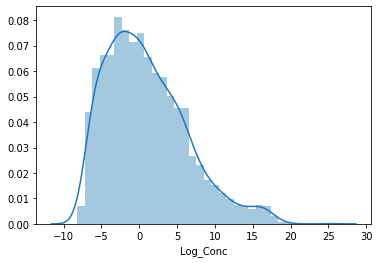

In [4]:
sns.distplot(public_plasma_proteome.Log_Conc)

Load internal database of plasma proteins: 

**Uniprot_Accession**: Uniprot accession 
**Pvalue**: P value based in the Zscore

In [5]:
inhouse_plasma_proteome = pd.read_csv("data/custom-plasma-proteome.csv")
inhouse_plasma_proteome.head()

,UniprotAccession,Pvalue
0,A0A075B6H7,0.380322
1,A0A075B6H9,0.493844
2,A0A075B6I0,0.590413
3,A0A075B6I1,0.238156
4,A0A075B6I4,0.238156


In [6]:
dataset = pd.read_csv("data/sample-example.csv")
dataset.head()

,UniprotAccession,Description,Globulins,PSMs,Abundance[S4],Abundance[S37],Abundance[S38],Abundance[S39],Abundance[S40],Abundance[S41],...,Found[S37],Found[S38],Found[S39],Found[S40],Found[S41],Found[S42],Found[S43],Found[S44],Found[S45],Gene
0,Q9Y3D6,Mitochondrial fission 1 protein OS=Homo sapien...,0,33,2.458242e+05,196345.65190,21321.138670,2643.908936,107823.93750,24494.51367,...,Peak Found,Peak Found,Peak Found,Peak Found,Peak Found,Peak Found,Peak Found,Peak Found,Peak Found,FIS1
1,Q6UY14,ADAMTS-like protein 4 OS=Homo sapiens OX=9606 ...,0,9,3.391171e+04,19308.35547,51113.827150,3389.173340,22343.27148,26381.99512,...,Peak Found,Peak Found,Peak Found,Peak Found,Peak Found,Peak Found,Peak Found,Peak Found,Peak Found,ADAMTSL4
2,O95340,Bifunctional 3'-phosphoadenosine 5'-phosphosul...,0,10,2.463229e+03,NaN,15918.753910,3854.183838,33735.15625,77540.17773,...,Not Found,Peak Found,Not Found,Peak Found,Peak Found,Peak Found,Peak Found,Not Found,Not Found,PAPSS2
3,Q96EI5,Transcription elongation factor A protein-like...,0,4,1.141564e+05,NaN,2213.285889,4548.162598,NaN,NaN,...,Not Found,Peak Found,Peak Found,Not Found,Not Found,Peak Found,Not Found,Not Found,Not Found,TCEAL4
4,Q9UBF2,Coatomer subunit gamma-2 OS=Homo sapiens OX=96...,0,47,5.057266e+06,NaN,77286.744140,5104.402832,95535.07031,453259.47270,...,Not Found,Peak Found,Not Found,Peak Found,Peak Found,Peak Found,Peak Found,Peak Found,Peak Found,COPG2


In [7]:
dataset = dataset.merge(inhouse_plasma_proteome, on="UniprotAccession", how = 'inner')
dataset = dataset.merge(public_plasma_proteome, on="Gene", how='inner')
dataset.head()

,UniprotAccession,Description_x,Globulins,PSMs,Abundance[S4],Abundance[S37],Abundance[S38],Abundance[S39],Abundance[S40],Abundance[S41],...,Found[S42],Found[S43],Found[S44],Found[S45],Gene,Pvalue,Description_y,Log_Conc,Zscore,Pvlue
0,Q6UY14,ADAMTS-like protein 4 OS=Homo sapiens OX=9606 ...,0,9,3.391171e+04,19308.35547,51113.82715,3389.17334,22343.27148,26381.99512,...,Peak Found,Peak Found,Peak Found,Peak Found,ADAMTSL4,0.400645,ADAMTS like 4,5.554589,0.860438,0.805226
1,Q6ZVX7,F-box only protein 50 OS=Homo sapiens OX=9606 ...,0,10,5.678957e+04,167469.12500,99329.69824,13743.05273,134202.07080,213142.78810,...,Peak Found,Peak Found,Not Found,Peak Found,NCCRP1,0.274225,Non-specific cytotoxic cell receptor protein 1...,0.263034,-0.125790,0.449949
2,P06454,Prothymosin alpha OS=Homo sapiens OX=9606 GN=P...,0,92,1.276364e+06,13085.85352,NaN,19071.98242,720328.62110,512464.64110,...,Peak Found,Peak Found,Peak Found,Peak Found,PTMA,0.274225,Prothymosin alpha,-0.713119,-0.307724,0.379146
3,Q96FQ6,Protein S100-A16 OS=Homo sapiens OX=9606 GN=S1...,0,25,8.969265e+04,87254.54688,56229.37500,24712.41211,NaN,392967.57810,...,Peak Found,Peak Found,Not Found,Not Found,S100A16,0.144423,S100 calcium binding protein A16,-3.442222,-0.816368,0.207145
4,O43665,Regulator of G-protein signaling 10 OS=Homo sa...,0,10,2.838381e+05,29854.17578,22498.36328,40576.03906,51868.91016,16779.62305,...,Peak Found,Not Found,Peak Found,Peak Found,RGS10,0.144423,Regulator of G protein signaling 10,0.485427,-0.084341,0.466392


In [10]:
def compute_probability (row):
    probability_protein = row['Pvalue']+row['Zscore']-(row['Pvalue']*row['Zscore'])
    return probability_protein
dataset['final_probability'] = dataset.apply (lambda row: compute_probability(row), axis=1)

dataset.head()

,UniprotAccession,Description_x,Globulins,PSMs,Abundance[S4],Abundance[S37],Abundance[S38],Abundance[S39],Abundance[S40],Abundance[S41],...,Found[S43],Found[S44],Found[S45],Gene,Pvalue,Description_y,Log_Conc,Zscore,Pvlue,final_probability
0,Q6UY14,ADAMTS-like protein 4 OS=Homo sapiens OX=9606 ...,0,9,3.391171e+04,19308.35547,51113.82715,3389.17334,22343.27148,26381.99512,...,Peak Found,Peak Found,Peak Found,ADAMTSL4,0.400645,ADAMTS like 4,5.554589,0.860438,0.805226,0.916353
1,Q6ZVX7,F-box only protein 50 OS=Homo sapiens OX=9606 ...,0,10,5.678957e+04,167469.12500,99329.69824,13743.05273,134202.07080,213142.78810,...,Peak Found,Not Found,Peak Found,NCCRP1,0.274225,Non-specific cytotoxic cell receptor protein 1...,0.263034,-0.125790,0.449949,0.182929
2,P06454,Prothymosin alpha OS=Homo sapiens OX=9606 GN=P...,0,92,1.276364e+06,13085.85352,NaN,19071.98242,720328.62110,512464.64110,...,Peak Found,Peak Found,Peak Found,PTMA,0.274225,Prothymosin alpha,-0.713119,-0.307724,0.379146,0.050886
3,Q96FQ6,Protein S100-A16 OS=Homo sapiens OX=9606 GN=S1...,0,25,8.969265e+04,87254.54688,56229.37500,24712.41211,NaN,392967.57810,...,Peak Found,Not Found,Not Found,S100A16,0.144423,S100 calcium binding protein A16,-3.442222,-0.816368,0.207145,-0.554043
4,O43665,Regulator of G-protein signaling 10 OS=Homo sa...,0,10,2.838381e+05,29854.17578,22498.36328,40576.03906,51868.91016,16779.62305,...,Not Found,Peak Found,Peak Found,RGS10,0.144423,Regulator of G protein signaling 10,0.485427,-0.084341,0.466392,0.072262
